In [ ]:
**1.Setup and Load Data**

**1.1 Install dependencies and Setup**

In [ ]:
!pip install tensorflow tensorflow-gpu opencv-python matplotlib

In [ ]:
!pip install --upgrade pip

In [6]:
!pip cache purge

Files removed: 20


In [ ]:
!pip install tensorflow-gpu==2.11.0

In [ ]:
!pip list

In [24]:
import tensorflow as tf 
import os #used for navigate through the file structures

In [10]:
gpus = tf.config.experimental.list_physical_devices('GPU')

In [11]:
len(gpus)

1

In [ ]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

**1.2 Remove doddy images**

In [13]:
import cv2
import imghdr
import tensorflow as tf

In [13]:
data_dir = '/content/drive/MyDrive/DIP dataset' 

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [14]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [15]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path) # Open image using openCV
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path) # Remove doddy images
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            

**1.3 Load data**

In [15]:
import numpy as np
from matplotlib import pyplot as plt

In [17]:
data = tf.keras.utils.image_dataset_from_directory('/content/drive/MyDrive/DIP dataset') # Use Built-in pipeline through keras framework

Found 329 files belonging to 2 classes.


In [18]:
data_iterator = data.as_numpy_iterator() 

In [24]:
# Get another batch from the iterator
batch = data_iterator.next()

In [25]:
#batch 0 is Lemon 
#batch 1 is Mango
batch[0].max()

210.46875

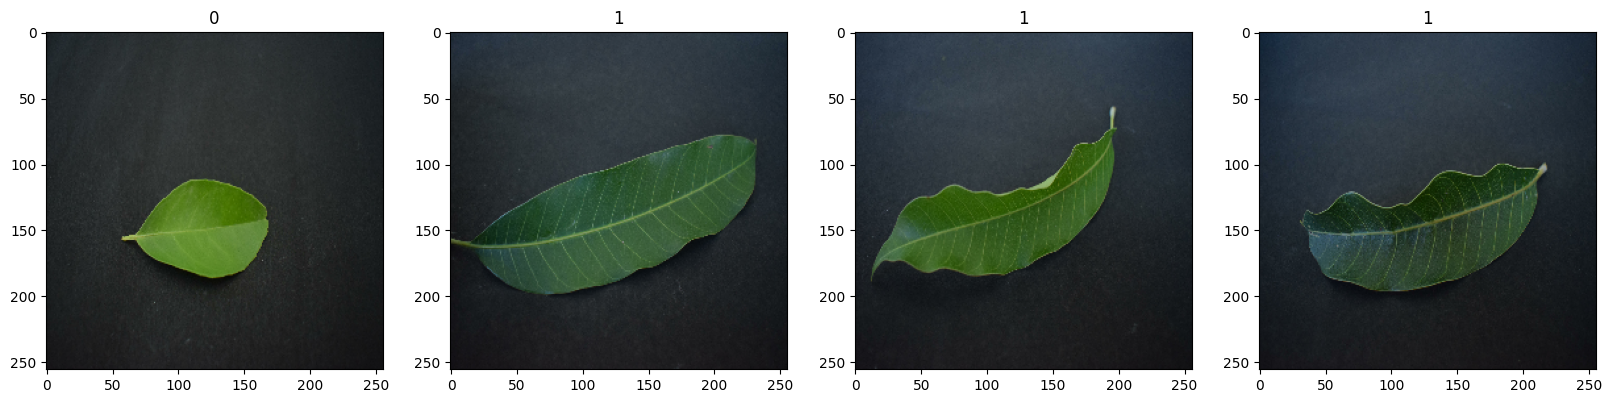

In [26]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

**2.Preprocess**

**2.1 Scale data**

In [ ]:
data = data.map(lambda x,y: (x/255, y)) # x=images y=labels

In [30]:
scaled_iterator = data.as_numpy_iterator()
batch = scaled_iterator.next()

In [31]:
data.as_numpy_iterator().next()[0].max()

0.79927236

In [32]:
batch[0].max()

0.85335475

In [33]:
batch[0].min()

0.0

**2.2 Split data**

In [34]:
len(data)

11

In [43]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)+1

In [44]:
train_size+val_size+test_size

11

In [45]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

**3.Deep Learning Model**

**3.1Build deep learning model**

In [25]:
from tensorflow.keras.models import Sequential # Model building API
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

In [47]:
model = Sequential()

In [48]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [49]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [50]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

**3.2Train**

In [51]:
logdir='logs'

In [52]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [53]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
7/7 [==============================] - 71s 6s/step - loss: 0.5920 - accuracy: 0.7946 - val_loss: 0.3394 - val_accuracy: 0.9531
Epoch 2/20
7/7 [==============================] - 68s 6s/step - loss: 0.2324 - accuracy: 0.9420 - val_loss: 0.0791 - val_accuracy: 0.9844
Epoch 3/20
7/7 [==============================] - 64s 6s/step - loss: 0.1192 - accuracy: 0.9420 - val_loss: 0.0807 - val_accuracy: 0.9844
Epoch 4/20
7/7 [==============================] - 64s 6s/step - loss: 0.0594 - accuracy: 0.9688 - val_loss: 0.0102 - val_accuracy: 1.0000
Epoch 5/20
7/7 [==============================] - 68s 6s/step - loss: 0.1387 - accuracy: 0.9732 - val_loss: 0.1038 - val_accuracy: 0.9375
Epoch 6/20
7/7 [==============================] - 73s 7s/step - loss: 0.1221 - accuracy: 0.9420 - val_loss: 0.0872 - val_accuracy: 0.9844
Epoch 7/20
7/7 [==============================] - 73s 8s/step - loss: 0.0869 - accuracy: 0.9643 - val_loss: 0.0605 - val_accuracy: 0.9844
Epoch 8/20
7/7 [==================

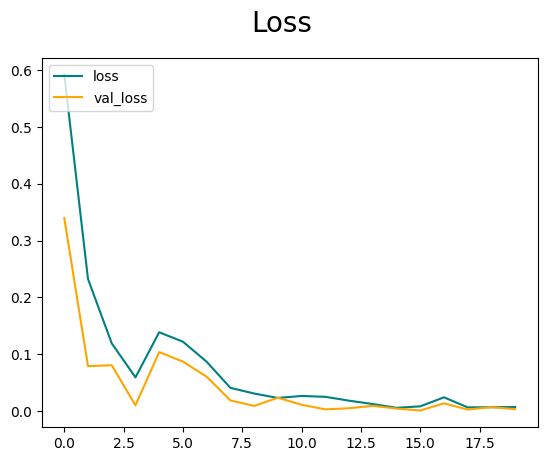

In [54]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

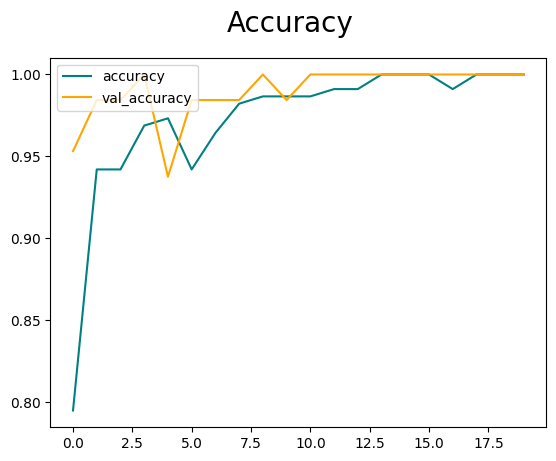

In [55]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

**4. Evaluate Performence**

**4.1 Evaluate**

In [26]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy # Deferent meters for use in clarification problems

In [57]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [ ]:
# loop through each batch in testing data
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

In [59]:
print(f'Precision:{pre.result().numpy()}, Reacall:{re.result().numpy()}, Accuracy:{acc.result().numpy()}')

Precision:1.0, Reacall:1.0, Accuracy:1.0


**4.2 Test**

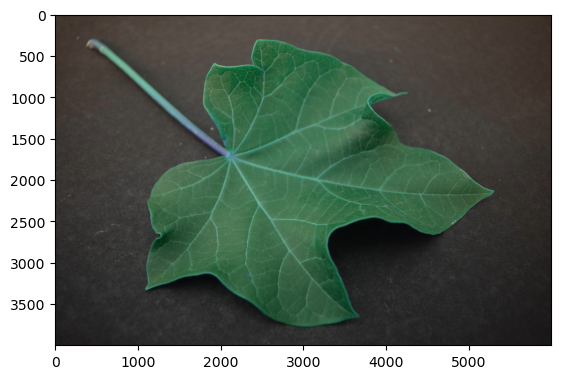

In [29]:
img = cv2.imread('0006_0002.JPG')
plt.imshow(img)
plt.show()

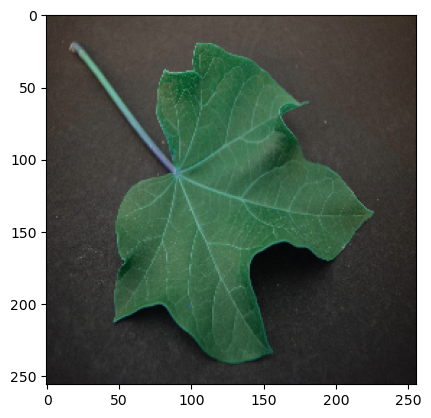

In [30]:
# Resize the image
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [ ]:
yhat = model.predict(np.expand_dims(resize/255, 0))

In [ ]:
yhat

In [97]:
if yhat > 0.5 and yhat <= 1.0:
    print('Predicted class is Mango Leaf')
elif yhat <= 0.5 and yhat >= 0.1:
    print('Predicted class is Lemon Leaf')
else:
    print('This is not Mango leaf or Lemon leaf')

Predicted class is Lemon Leaf


In [ ]:
 **5. Save the Model**

In [5]:
from tensorflow.keras.models import load_model

In [ ]:
model.save(os.path.join('models','MangoLemonModel.h5'))

In [ ]:
**1. Test Model **

In [22]:
from tensorflow.keras.models import load_model

In [25]:
new_model = load_model(os.path.join('MangoLemonModel.h5'))

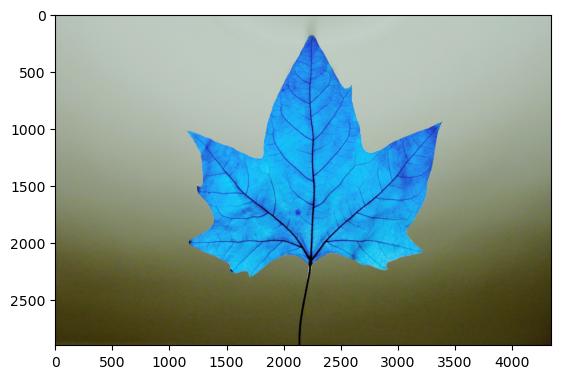

In [36]:
img = cv2.imread('Maple.jpg')
plt.imshow(img)
plt.show()

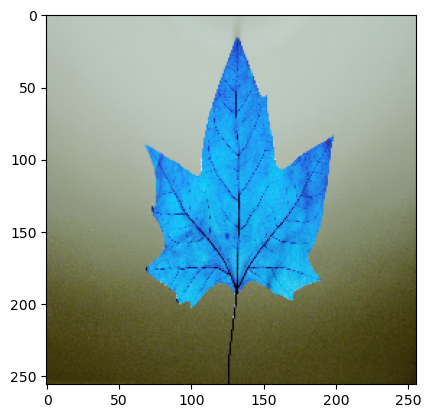

In [37]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [38]:
new_model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 29ms/step


array([[1.]], dtype=float32)

In [39]:
yhatnew = new_model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 26ms/step


In [40]:
if yhatnew > 0.5 and yhatnew <= 1.0:
    print('Predicted class is Mango Leaf')
elif yhatnew <= 0.5:
    print('Predicted class is Lemon Leaf')

Predicted class is Mango Leaf
